In [1]:
# Final code to perform sliding window evaluation of a recording

In [1]:
import os
current_pwd = os.getcwd()

os.chdir(r"C:\Users\Rafael\OneDrive - Delft University of Technology\Sliding window evaluation")
from sliding_window_evaluation import main as swe_main
os.chdir(current_pwd)

import glob
from tensorflow.keras.models import load_model
import random as rd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
########### Load Model ###########
dir_model = '../Modeling/Models/1DCNN per sensor + bLSTM/AccGyro_unstandardized/my_model.h5'
#dir_model = '../Modeling/Models/Results_normalized/models_normalized/1DCNN_combined_bLSTM_normalized.h5'

model = load_model(dir_model)

normalize = False # Whether to normalize the signals to max absolute value 1

print('Model loaded')

Model loaded


Recording loaded


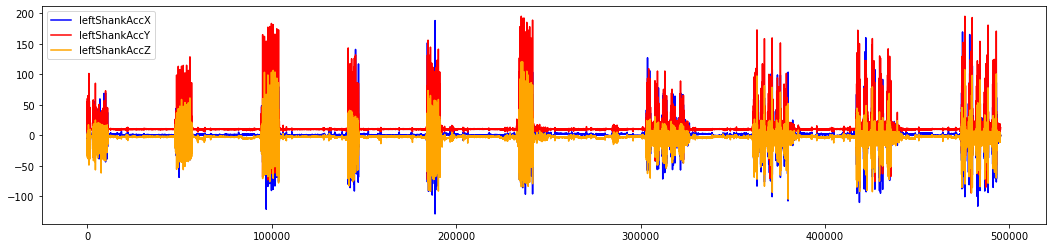

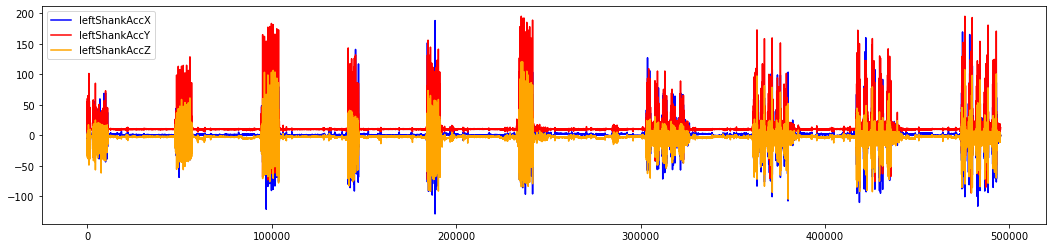

In [6]:
############ Load recording ###############
original_dataset = False #True to use original wilmes dataset. False to use any other dataset

if original_dataset: # Use original Wilmes dataset. This script does not work with normalized original dataset
    all_categories = False #True to use all categories or dataset. False to use selected categories

    num_recordings = 5 # Number of recordings to use. They will be concatenated
    seed = None # Random seed
    
    # Files where the csv files with the recordings are
    files_dir = r'C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Split\\'

    # Files where the labels of each recording are
    file_labels = r'C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Split\labels_per_csv\gen_labels_per_csv.csv'

    # Only select recordings with the following activities
    df_labels = pd.read_csv(file_labels)

    if all_categories:
        categories_true = {'Jog (10m)': [0],
                            'Sub maximal run (10m)': [1],
                            'Maximal run (10m)': [2],
                            'Jog with rapid stop (10m)': [3],
                            'Sub maximal run with rapid stop (10m)': [4],
                            'Maximal run with rapid stop (10m)': [5],
                            'Jog with 180 deg turn (10m)': [6],
                            'Sub maximal run with 180 deg turn (10m)': [7],
                            'Maximal run with 180 deg turn (10m)': [8],
                            'Jog followed by 90 deg cut (5m)': [9],
                            'Sub maximal run followed by 90 deg cut (5m)': [10],
                            'Maximal run followed by 90 deg cut (5m)': [11],
                            'Standing jump': [12],
                            'Jump with a small run-up': [14],
                            'Short pass': [15],
                            'Long pass': [16],
                            'Shot': [17],
                            'Maximal sprint (30m)': [18]}

    else:
        categories_true = {'shot': [17],
                          'sprint': [18],
                          'jump': [12],
                          'jog': [0],
                          'pass': [15]}

    # List of numeric labels of desired activities
    target_labels = [j for i in categories_true.values() for j in i]

    # Recordings with the desired activities 
    target_files = df_labels[df_labels['gen_label'].isin(target_labels)]

    # Reverse dictionary of labels and categories
    categories_true = {i:k for k,v in categories_true.items() for i in v}

    # Use num_recording amount of random recordings
    random_files = target_files.sample(num_recordings, random_state = seed)
    for i, random_file in enumerate(random_files.values):
        test_file_temp = random_file[0]
        true_label = random_file[1]
        true_label_name_temp = categories_true[true_label]
        recording_temp = pd.read_csv(files_dir + test_file_temp)
        if i == 0:
            recording = recording_temp
            true_label_name = true_label_name_temp
        else:
            recording_temp['time'] = recording_temp['time'] + recording['time'].values[-1]
            recording = pd.concat([recording, recording_temp], ignore_index=True)
            true_label_name = true_label_name + ' + '  + true_label_name_temp
    
    # Choose normalizing recording
    df = recording

    print('Recording loaded')
    
    # Plot whole recording
    fig, axes = plt.subplots(figsize=(18,4))
    recording.plot.line(ax = axes, y = ['leftShankAccX', 'leftShankAccY', 'leftShankAccZ'], color = ['blue', 'red', 'orange']);
        
else: # Use another dataset

    # Files where the csv files with the recordings are
    files_dir = r'C:\Users\Rafael\OneDrive - Delft University of Technology\Data\Rozemarijn\Synchronized\\*.csv'

    # Read recording
    seed = 0 # Random seed
    rd.seed(seed)
    random_file = rd.sample(glob.glob(files_dir),1)[0]
    df = pd.read_csv(random_file, index_col = 0) 
    print('Recording loaded')

    true_label_name = None # True label of recording. Set to None if unknown
    
    # Plot whole recording
    fig, axes = plt.subplots(figsize=(18,4))
    df.plot.line(ax = axes, y = ['leftShankAccX', 'leftShankAccY', 'leftShankAccZ'], color = ['blue', 'red', 'orange']);

    # Plot part of recording and choose it
    fig, axes = plt.subplots(figsize=(18,4))
    recording = df.iloc[:,:] # Choose part of recording
    recording.plot.line(ax = axes, y = ['leftShankAccX', 'leftShankAccY', 'leftShankAccZ'], color = ['blue', 'red', 'orange']);
    
    # Choose another normalizing recording if wanted
    #df = pd.read_csv(random_file, index_col = 0) 

In [7]:
############### Parameters ###################
# Possible order of sensors (Do not touch!)
order_of_sensors_acc = ['leftShankAccX', 'leftShankAccY', 'leftShankAccZ', 'rightShankAccX', 'rightShankAccY', 'rightShankAccZ', 'leftThighAccX', 'leftThighAccY', 'leftThighAccZ', 'rightThighAccX', 'rightThighAccY', 'rightThighAccZ', 'pelvisAccX', 'pelvisAccY', 'pelvisAccZ']
order_of_sensors_acc_gyro = ['leftShankAccX' ,'leftShankAccY' ,'leftShankAccZ' ,'leftShankGyroX', 'leftShankGyroY' ,'leftShankGyroZ' ,'rightShankAccX' ,'rightShankAccY' ,'rightShankAccZ' ,'rightShankGyroX' ,'rightShankGyroY' ,'rightShankGyroZ' ,'leftThighAccX' ,'leftThighAccY' ,'leftThighAccZ' ,'leftThighGyroX' ,'leftThighGyroY' ,'leftThighGyroZ' ,'rightThighAccX' ,'rightThighAccY' ,'rightThighAccZ' ,'rightThighGyroX' ,'rightThighGyroY' ,'rightThighGyroZ' ,'pelvisAccX' ,'pelvisAccY' ,'pelvisAccZ' ,'pelvisGyroX' ,'pelvisGyroY' ,'pelvisGyroZ']

order_of_sensors = order_of_sensors_acc_gyro # Choose order of sensors among the two options above

sampling_freq_original = 200 # Sampling freq of the recording
sampling_freq = 500 # Desired sampling frequency

# File where the labels used by the model are
file_labels_model = r'C:\Users\Rafael\OneDrive - Delft University of Technology\Modeling\Datasets\1s_ssjjp\all_Acc-Gyro_all_unstandardized\labels_dict.json'

time_window = 1 # Time of the windows in seconds
step = 100e-3 # Step in seconds of the sliding windows. If -1, the step is 1 timestep. Must be larger than 1/sampling_freq
batch_size = 128 # Batch size for the prediction phase

thr_low_activity = 8.5 # Threshold for low activity detection
score_low = 0.98 # Confidence score given to predictions considered as "low activity"

thr_other_high = 0.5 # Threshold to define "other high activity". Any prediction with score smaller than this, is considered "other high activity". Leave it as None to not include this category
score_other_high = None # Confidence score given to predictions considered as "other high activity". Set to None to not impose this confidence to other high activities

method = 'best_score' # Method for postprocessing the predictions. 'mode', 'best_score' or 'interpolate'
min_length_activity = 0.31 # Minimum consecutive seconds that a label must appear so it is not considered outlier

plot_colors = 'points' # Whether to colorcode the confidence of predictions or not in the plots

plot = True # Plot the predictions
text = True # Generate text summary of predictions

In [ ]:
predictions_no_outliers, best_scores, text_activities, labels_dict = swe_main(model = model, recording = recording, df = df, sampling_freq_original = sampling_freq_original, order_of_sensors = order_of_sensors, order_of_sensors_acc = order_of_sensors_acc, file_labels_model = file_labels_model, thr_low_activity = thr_low_activity, sampling_freq = sampling_freq, normalize = normalize, df_normalizer = None,  method = method, step = step, min_length_activity = min_length_activity, time_window = time_window, score_low = score_low, thr_other_high = thr_other_high, score_other_high = score_other_high, batch_size = batch_size, true_label_name = true_label_name, plot_colors = plot_colors, text = text, plot = plot)